# One Factor At the Time analysis

This notebook contains the code to do some OFAT analysis. For each parameter and output variable a plot will be created. 

In [2]:
# import some stuff
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plot

## Reading data

For each parameter there is a seperate file containing the data of varying that parameter while keeping the other parameters fixed at the default values. This function read the data belonging to a parameter and returns it as a Pandas dataframe.

In [3]:
def read_data(path):
    data = pd.read_csv(path)
    data['total'] = np.round(data['N'] // 2) + np.round((data['N'] // 2) * data['ratio']) + data['N'] - np.round(
        data['N'] // 2) - np.round(
        (data['N'] // 2) * data['ratio'])

    data['pfl_net'] = (data['pheromone'] - data['followers'] - data['leaders']) / data['total']
    data['pu_net'] = (data['pheromone'] - data['unassigned']) / data['total']
    data['flu_net'] = (data['followers'] + data['leaders'] - data['unassigned']) / data['total']

    return data

## Creating plots

In the module 'plot' the function plot_all_vars is defined. This produces a parameter vs output variable plot for each of the output variables. The resulting figure contains a scatter plot and line plot of the mean output values with the 95% confidence interval as errorbar.

Parameter plots can now be created by changing the param variable in the following code block. The paramater names are listed below.

- 'p_uf' - The transition probability from unassigned to follower
- 'p_pu' - The transition probability from pheromoner to unassigned
- 'p_up' - The transition probability from unassigned to pheromoner
- 'p_fl' - The transition probability from follower to leader (success)
- 'p_lu' - The transition probability from leader (and its followers) to unassigned (failure)
- 'g' - Group size
- 'ratio' - Initial ratio leaders, pheromoners
- 'N' - Number of ants
- 'size' - Grid size

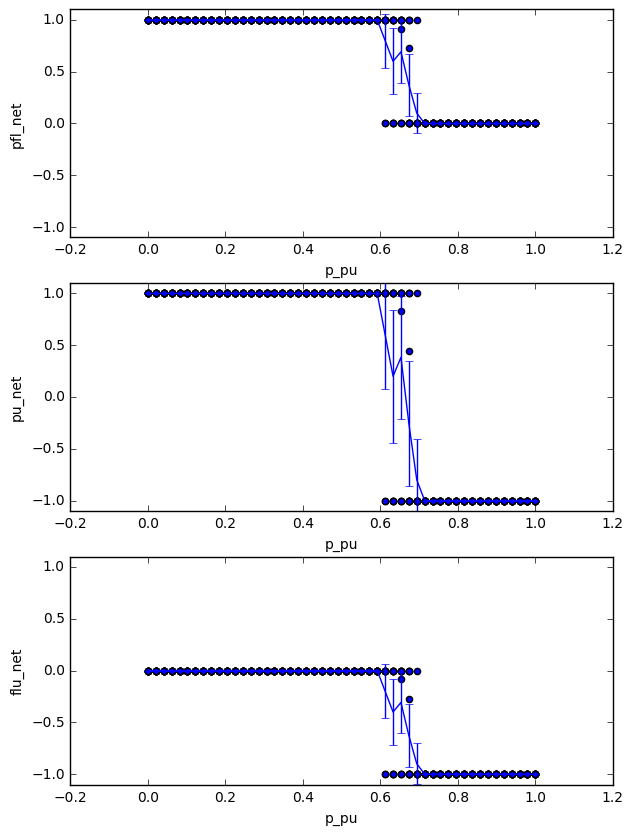

In [8]:
prefix = '../Data/ofat_full/ofat_2_2_2_'
param = 'p_pu'
data = read_data(prefix + param + '.csv')
plot.plot_all_vars(data, param)
plt.show()